In [1]:
import numpy as np
from scipy import spatial,signal
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

### 信号处理-signal

### 中值滤波

中值滤波和顺序统计滤波结果是否一致: True


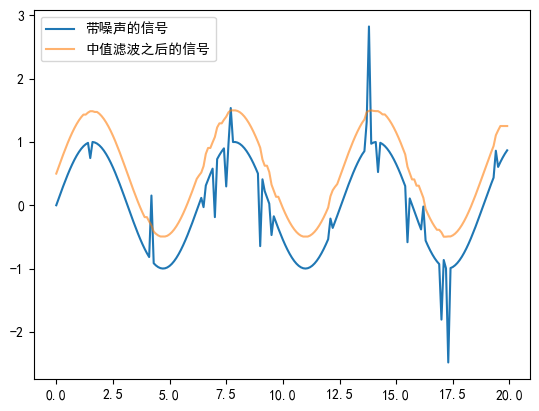

In [2]:
t = np.arange(0, 20, 0.1)
x = np.sin(t)
x[np.random.randint(0, len(t), 20)] += np.random.standard_normal(20) * 0.6  # 在信号中添加随机噪声

# 使用中值滤波去除瞬时噪声
x2 = signal.medfilt(x, 5)  # 使用中值滤波器对信号进行中值滤波
x3 = signal.order_filter(x, np.ones(5), 2)  # 使用顺序统计滤波器对信号进行中值滤波

# 检查中值滤波和顺序统计滤波的结果是否完全一致
is_equal = np.all(x2 == x3)
print("中值滤波和顺序统计滤波结果是否一致:", is_equal)

# 绘制带噪声的信号和中值滤波之后的信号
plt.plot(t, x, label="带噪声的信号")
plt.plot(t, x2 + 0.5, alpha=0.6, label="中值滤波之后的信号")
plt.legend(loc="best")


### 滤波器设计

In [3]:
sampling_rate = 8000.0

# 设计带通滤波器
# 设定通带范围为 0.2*4000 - 0.5*4000
# 设定阻带范围为 <0.1*4000, >0.6*4000
# 设定通带增益的最大衰减值为2dB
# 设定阻带的最小衰减值为40dB
b, a = signal.iirdesign([0.2, 0.5], [0.1, 0.6], 2, 40)  # 设计带通滤波器

# 使用 freqz 函数计算滤波器的频率响应
w, h = signal.freqz(b, a)  # 计算滤波器的频率响应

# 计算增益，并将增益转换为分贝
power = 20 * np.log10(np.clip(np.abs(h), 1e-8, 1e100))  # 计算增益，并将增益转换为分贝
freq = w / np.pi * sampling_rate / 2  # 计算频率



Text(0.5, 0, '频率(Hz)')

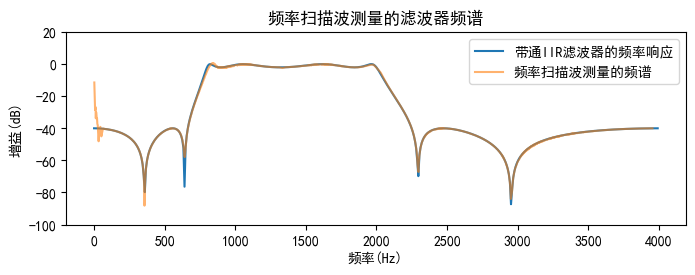

In [4]:
# 产生2秒钟的取样频率为 sampling_rate Hz 的频率扫描信号
t = np.arange(0, 2, 1/sampling_rate)  # 生成时间序列

# 使用 signal.chirp() 函数产生频率扫描信号
sweep = signal.chirp(t, f0=0, t1=2, f1=sampling_rate/2)  # 产生频率扫描信号

# 对频率扫描信号进行滤波
out = signal.lfilter(b, a, sweep)  # 应用 IIR 滤波器对频率扫描信号进行滤波

# 将波形转换为能量（以对数形式）
out = 20 * np.log10(np.abs(out))  # 将滤波后的波形转换为能量的对数形式

# 找到所有局部最大值的下标
index = signal.argrelmax(out, order=3)  # 找到频谱中的局部最大值的下标

# 绘制滤波之后的波形的增益和频率扫描波测量的频谱
plt.figure(figsize=(8, 2.5))  # 创建图形，并指定大小
plt.plot(freq, power, label="带通IIR滤波器的频率响应")
plt.plot(t[index]/2.0*4000, out[index], label="频率扫描波测量的频谱", alpha=0.6)
plt.legend(loc="best")  # 添加图例（标签）并自动选择最佳位置

# 设置绘图的标题、y轴范围和轴标签
plt.title("频率扫描波测量的滤波器频谱")
plt.ylim(-100, 20)
plt.ylabel("增益(dB)")
plt.xlabel("频率(Hz)")
# 在这段代码中，进行了以下修改和添加注释：

# 添加了用于生成时间序列的变量 t

# 使用 signal.chirp() 函数生成频率扫描信号 sweep

# 对频率扫描信号进行 IIR 滤波，得到滤波后的波形 out

# 将滤波后的波形转换为能量的对数形式

# 使用 signal.argrelmax() 函数找到频谱中的局部最大值的下标

# 绘制滤波器的频率响应曲线 power 和频谱的曲线 out

# 通过设置标题、y轴范围和轴标签来美化图形

# 通过添加这些详细注释，可以更清晰地了解代码的功能、数据处理和绘图过程。

### 连续时间线性系统

Text(0, 0.5, '位移（米）')

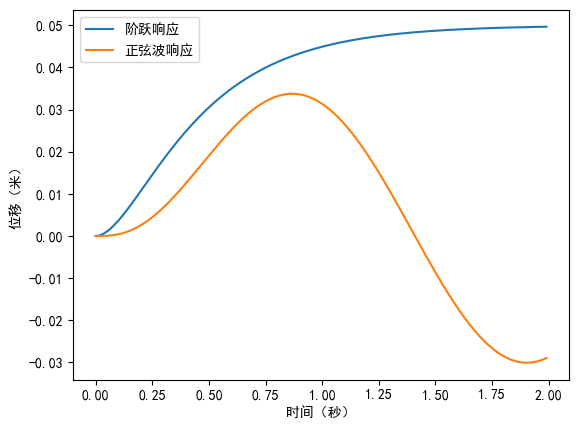

In [5]:
m, b, k = 1.0, 10, 20

# 定义系统的分子和分母
numerator = [1]
denominator = [m, b, k]

# 创建系统的传递函数对象
plant = signal.lti(numerator, denominator)

t = np.arange(0, 2, 0.01)

# 计算系统的阶跃响应
_, x_step = plant.step(T=t)

# 计算系统对正弦波信号的响应
_, x_sin, _ = signal.lsim(plant, U=np.sin(np.pi * t), T=t)

# 绘制系统的阶跃响应和正弦波响应
plt.plot(t, x_step, label="阶跃响应")
plt.plot(t, x_sin, label="正弦波响应")
plt.legend(loc="best")
plt.xlabel("时间（秒）")
plt.ylabel("位移（米）")
# 这段代码进行了如下修改和添加注释：

# 定义了系统的质量、阻尼和刚度参数 m、b、k

# 创建了系统的传递函数对象 plant，通过 signal.lti() 函数创建，传入分子和分母系数

# 生成了时间序列 t

# 计算系统的阶跃响应，并保存在 x_step中

# 使用 signal.lsim() 函数计算系统对正弦波信号的响应，并保存在 x_sin 中

# 绘制系统的阶跃响应和正弦波响应，添加图例、坐标轴标签

# 通过这些详细注释，可以更清晰地了解代码的功能、系统的参数、信号的响应和绘图过程。